# February Week-on-week view - Persone

Objetivo é analisar a evolução dos consultores durante um período de tempo (semana)

In [16]:
import pandas as pd
import matplotlib as plt


In [31]:
# Carregando dados da base em json
df = pd.read_json('bases/february_base.json')
df['Data Do Pedido'] = pd.to_datetime(df['Data Do Pedido'])

In [18]:
# Filtrando apenas o mês de Fevereiro
feb = df[df['Data Do Pedido'].dt.month == 2]


In [19]:
# Filtrando apenas os pedidos aprovados
feb = feb[feb['Status Do Pedido'] == 'approved']

In [20]:
# Definindo equipes: Agrupando agentes por equipe em arrays
equipe_m = ['Matteo Creso Di Iorio Martinelli', 'Fellipe Santamarca Galvão', 'Greice Freitas', 'Celeste Ferraz Balhesteros']
equipe_t = ['Alicia Souza da Silva', 'Caroline Pereira', 'Fabricia Paula', 'Maria Aparecida Costa Pereira Rodrigues']

In [21]:
# Filtrando vendas por equipe
febManha = feb[feb['Nome Do Agente'].isin(equipe_m)]
febTarde = feb[feb['Nome Do Agente'].isin(equipe_t)]


In [22]:
# Definindo Período: Semana x Semana
semana1 = ['2025-02-01', '2025-02-08']
semana2 = ['2025-02-10', '2025-02-15']
semana3 = ['2025-02-17', '2025-02-22']
 

In [23]:
# Filtrando resultados por equipe - Semana x Semana

# Equipe manha 
manha_semana1 = febManha[(febManha['Data Do Pedido'] >= semana1[0]) & (febManha['Data Do Pedido'] <= semana1[1])]
manha_semana2 = febManha[(febManha['Data Do Pedido'] >= semana2[0]) & (febManha['Data Do Pedido'] <= semana2[1])]
manha_semana3 = febManha[(febManha['Data Do Pedido'] >= semana3[0]) & (febManha['Data Do Pedido'] <= semana3[1])]

# Equipe tarde
tarde_semana1 = febTarde[(febTarde['Data Do Pedido'] >= semana1[0]) & (febTarde['Data Do Pedido'] <= semana1[1])]
tarde_semana2 = febTarde[(febTarde['Data Do Pedido'] >= semana2[0]) & (febTarde['Data Do Pedido'] <= semana2[1])]
tarde_semana3 = febTarde[(febTarde['Data Do Pedido'] >= semana3[0]) & (febTarde['Data Do Pedido'] <= semana3[1])]



In [24]:
# Criando séries com resultados semanais

dfManha_semana1 = manha_semana1['Nome Do Agente'].value_counts()
dfManha_semana2 = manha_semana2['Nome Do Agente'].value_counts()
dfManha_semana3 = manha_semana3['Nome Do Agente'].value_counts()
dfTarde_semana1 = tarde_semana1['Nome Do Agente'].value_counts()
dfTarde_semana2 = tarde_semana2['Nome Do Agente'].value_counts()
dfTarde_semana3 = tarde_semana3['Nome Do Agente'].value_counts()




In [25]:
# Concatenando resultados semanais em novo df

dfManha_semanal = pd.concat([dfManha_semana1, dfManha_semana2, dfManha_semana3], keys=['semana1', 'semana2', 'semana3'], axis=1)
dfTarde_semanal = pd.concat([dfTarde_semana1, dfTarde_semana2, dfTarde_semana3], keys=['semana1', 'semana2', 'semana3'], axis=1)

In [26]:
# Transpondo dados para organizar os dataframes

dfManha = dfManha_semanal.T.fillna(0).astype(int)
dfTarde = dfTarde_semanal.T.fillna(0).astype(int)

In [27]:
dfManha

Nome Do Agente,Matteo Creso Di Iorio Martinelli,Fellipe Santamarca Galvão,Greice Freitas,Celeste Ferraz Balhesteros
semana1,10,4,3,3
semana2,6,2,2,1
semana3,15,9,4,3


In [28]:
dfTarde

Nome Do Agente,Fabricia Paula,Alicia Souza da Silva,Maria Aparecida Costa Pereira Rodrigues,Caroline Pereira
semana1,12,7,6,3
semana2,12,5,0,5
semana3,14,7,4,5


<Axes: title={'center': 'Vendas por consultor: Semana x Semana'}, xlabel='Semanas', ylabel='Vendas'>

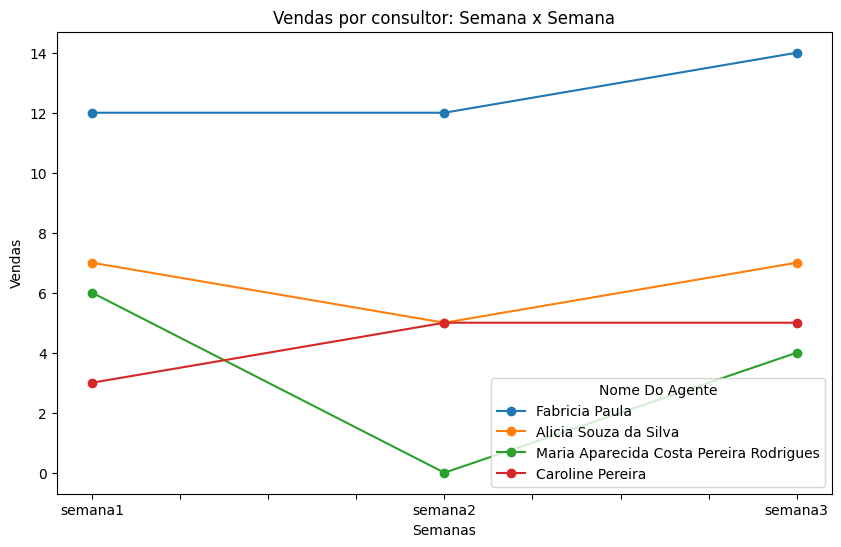

In [29]:
dfTarde.plot(
    kind='line',
    marker='o',  # Adiciona marcador nas linhas
    title='Vendas por consultor: Semana x Semana',
    xlabel='Semanas',
    ylabel='Vendas', 
    figsize=(10, 6)     #Tamanho do gráfico
)

<Axes: title={'center': 'Vendas por consultor: Semana x Semana - Fevereiro'}, xlabel='Semanas', ylabel='Vendas'>

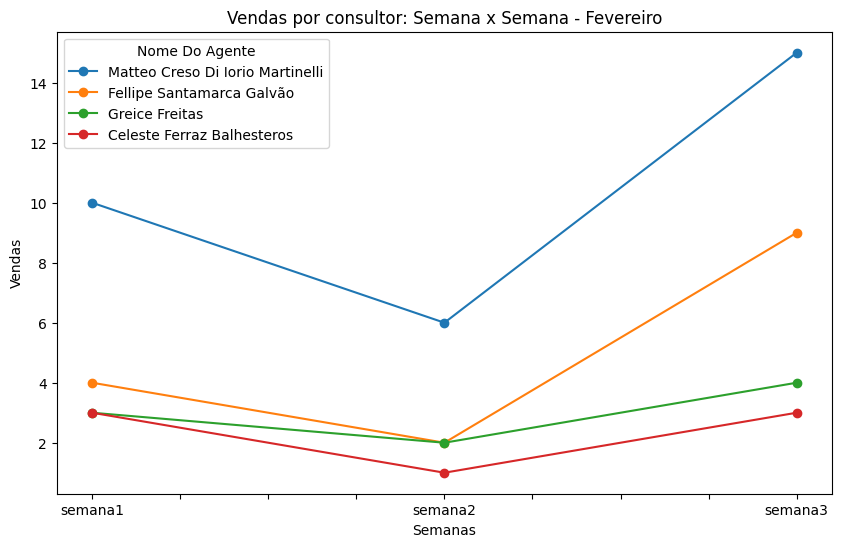

In [30]:
dfManha.plot(
    kind='line',
    marker='o',  # Adiciona marcador nas linhas
    title='Vendas por consultor: Semana x Semana - Fevereiro',
    xlabel='Semanas',
    ylabel='Vendas', 
    figsize=(10, 6)     #Tamanho do gráfico
)